# Logistic Regression Exercise | Kaggle Titanic Data Set
<hr>
**Author: ** *Gilberto Diaz*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
%matplotlib inline

In [3]:
dims = (11.7, 8.27)
plt.rcParams["patch.force_edgecolor"] = True

In [4]:
data_train = pd.read_csv('./titanic_train.csv')
data_test = pd.read_csv('./titanic_test.csv')

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## ETL
#### Training data missing values heat-map

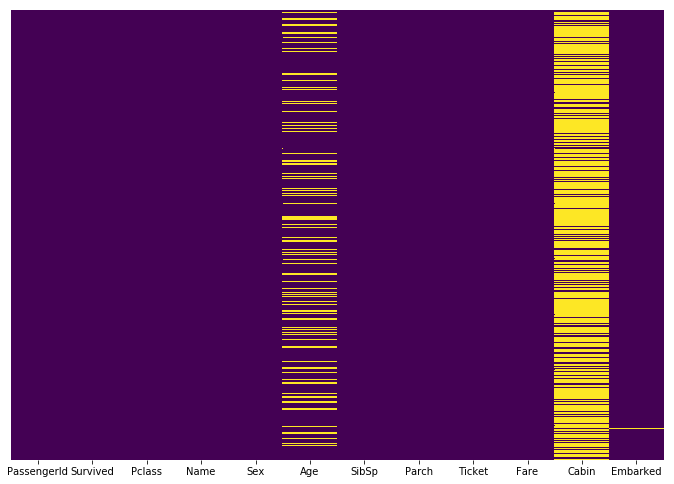

In [6]:
plt.figure(figsize=dims)
sb.heatmap(data_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Test data missing values heat-map

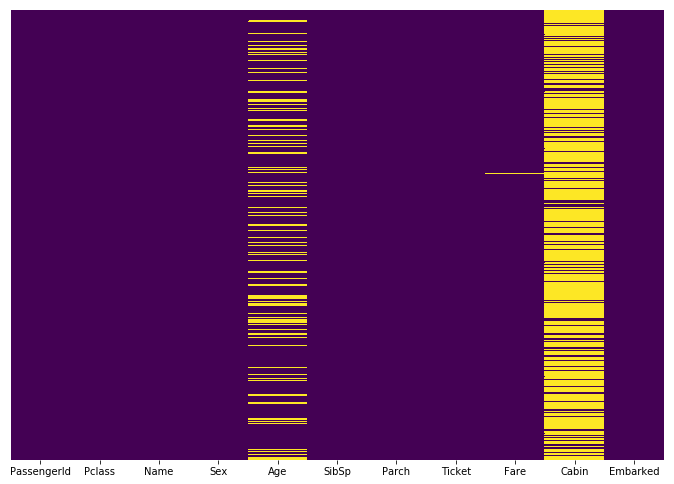

In [7]:
plt.figure(figsize=dims)
sb.heatmap(data_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

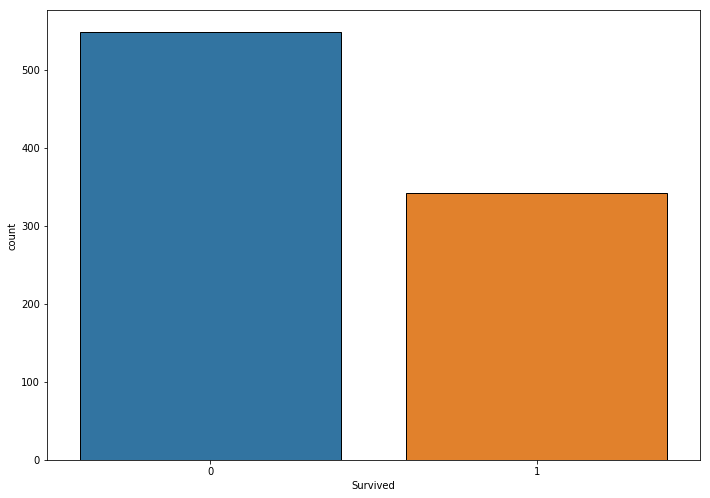

In [8]:
plt.figure(figsize=dims)
ax = sb.countplot(x='Survived', data=data_train)

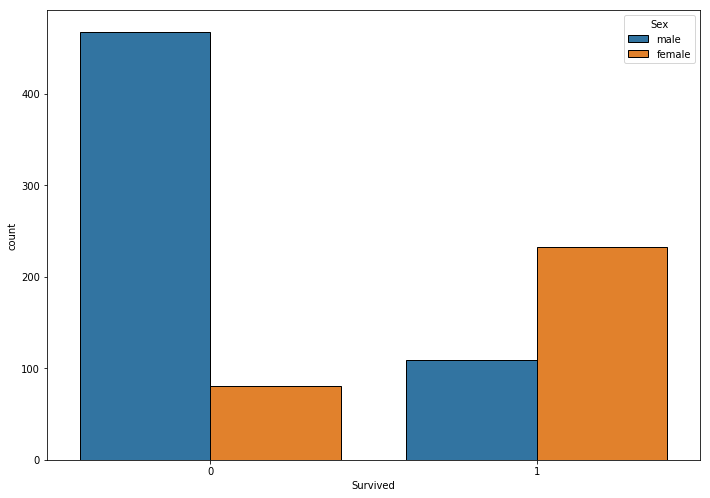

In [9]:
plt.figure(figsize=dims)
sb.countplot(x='Survived', hue='Sex', data=data_train)

Most people that died were male.

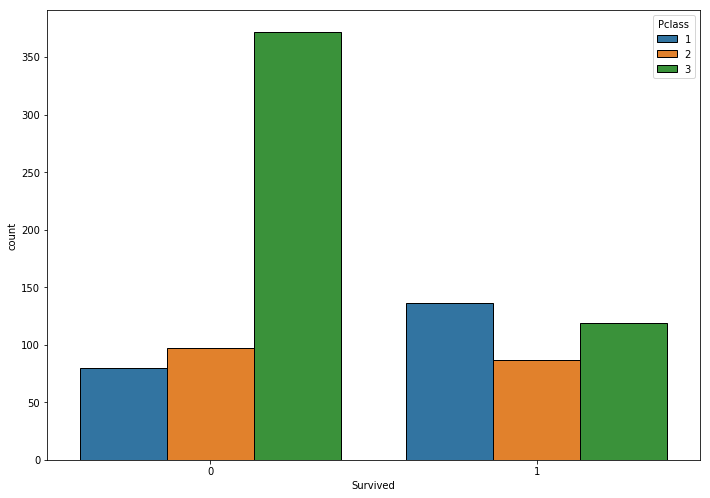

In [10]:
plt.figure(figsize=dims)
sb.countplot(x='Survived', hue='Pclass', data=data_train)

Most people that died were from the 3rd class.

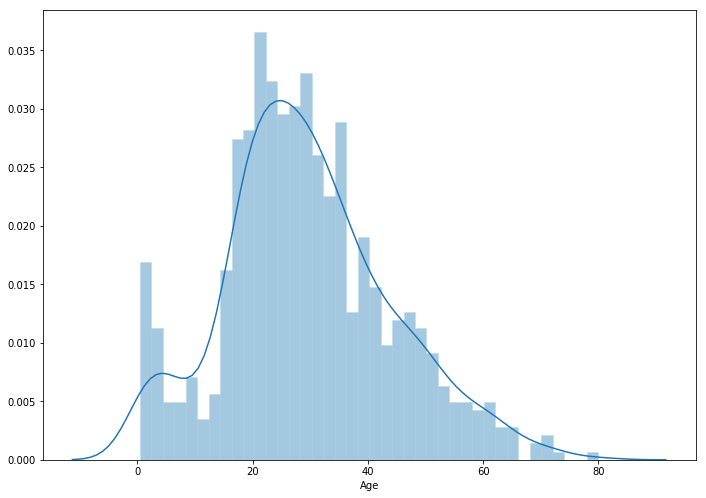

In [11]:
plt.figure(figsize=dims)
sb.distplot(data_train['Age'].dropna(), bins=40, hist_kws=dict(edgecolor="lightblue"))

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


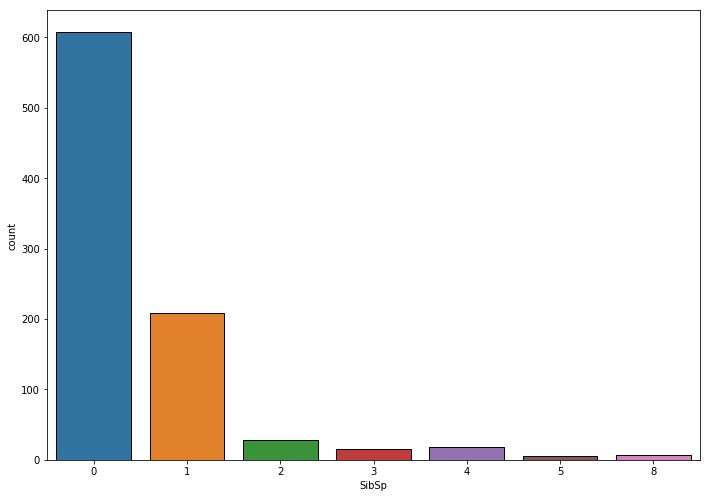

In [13]:
plt.figure(figsize=dims)
sb.countplot(x='SibSp', data=data_train)

Most were single.

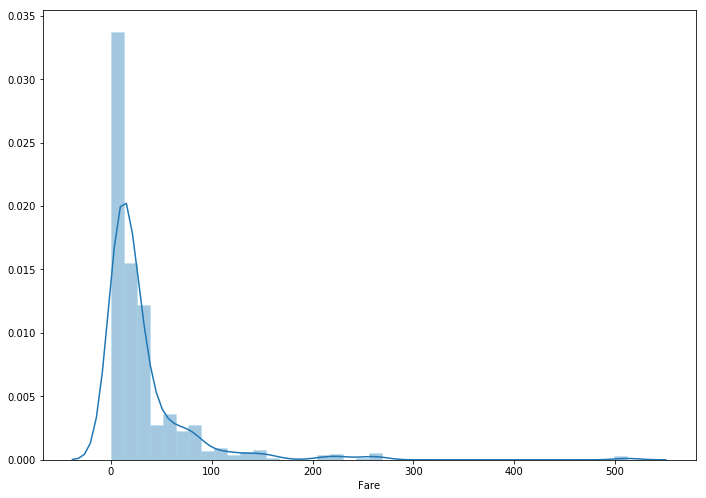

In [14]:
plt.figure(figsize=dims)
sb.distplot(data_train['Fare'], bins=40, hist_kws=dict(edgecolor='lightblue'))

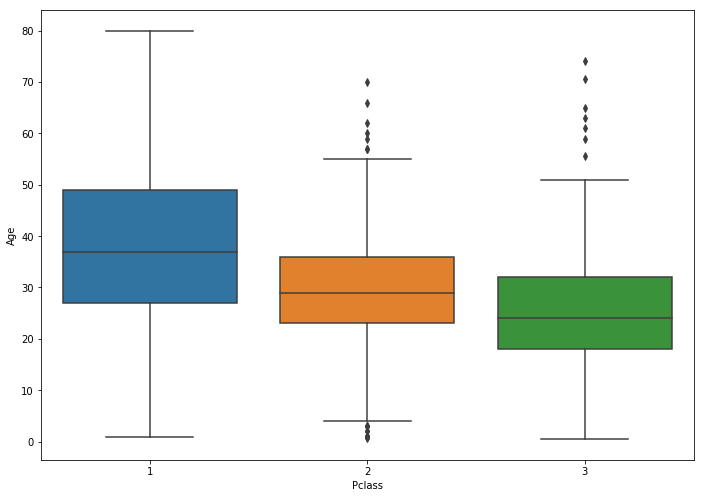

In [15]:
plt.figure(figsize=dims)
sb.boxplot(x='Pclass', y='Age', data=data_train)

Figuring out avg age by class. I'm going to impute missing ages with these avgs.

In [16]:
def impute_age(cols):
    """Imputes missing ages with a new value. This function is
       intendet to be used in combination with an apply 
       function.
       
        @athor  Gilberto Diaz
        
        @param  {cols} the columns passed to the apply function.
        @return {integer} the new age.
    """
    
    age = cols[0]
    p_class = cols[1]
    
    if pd.isnull(age): 
        if p_class == 1:
            return 37
        if p_class == 2:
            return 29
        else:
            return 24
        
    else:
        return age

In [17]:
data_train['Age'] = data_train[['Age', 'Pclass']].apply(impute_age, axis=1)
data_test['Age'] = data_test[['Age', 'Pclass']].apply(impute_age, axis=1)

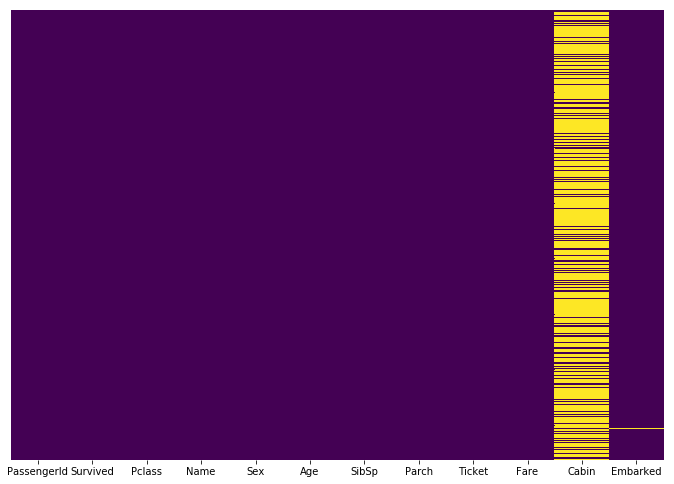

In [18]:
plt.figure(figsize=dims)
sb.heatmap(data_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

No missing values in the age column.

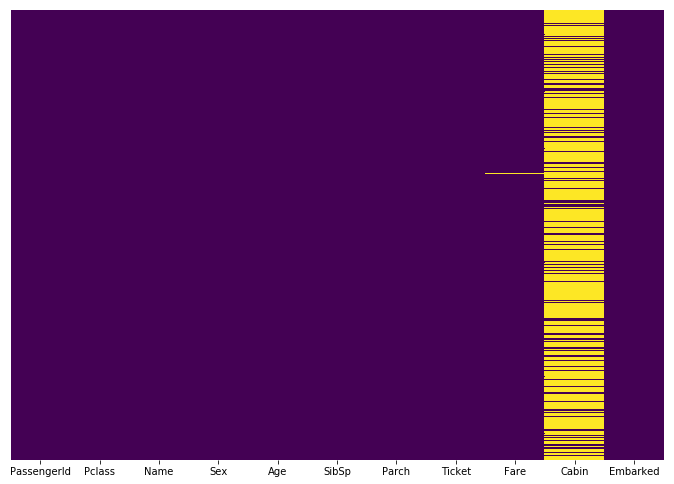

In [19]:
plt.figure(figsize=dims)
sb.heatmap(data_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

No missing values in the age column.

In [20]:
data_train.drop('Cabin', axis=1, inplace=True)
data_test.drop('Cabin', axis=1, inplace=True)

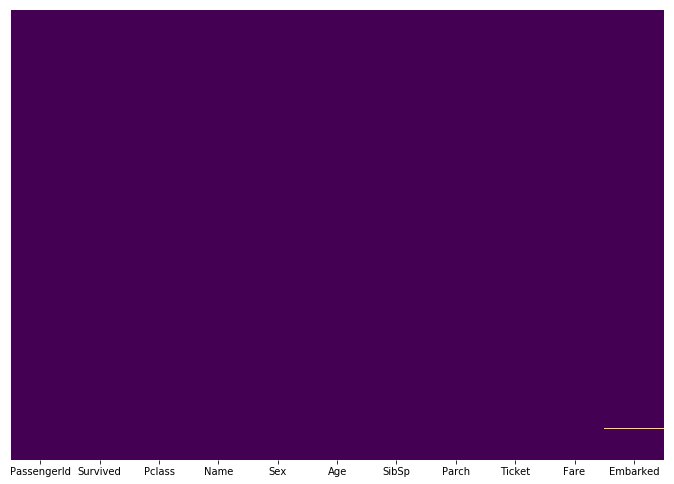

In [21]:
plt.figure(figsize=dims)
sb.heatmap(data_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

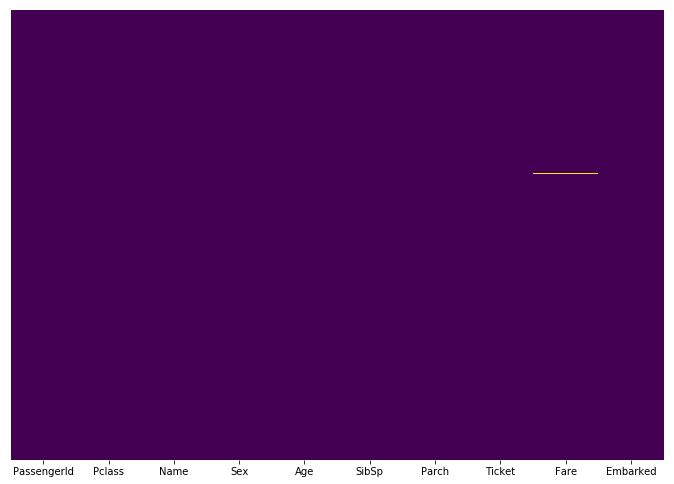

In [22]:
plt.figure(figsize=dims)
sb.heatmap(data_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

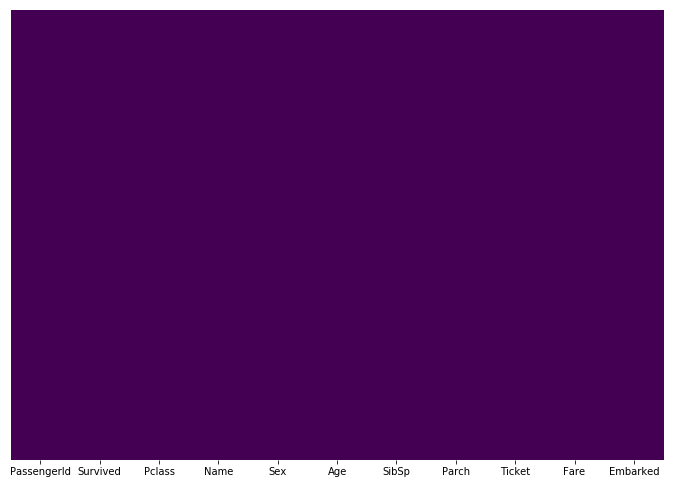

In [23]:
data_train.dropna(inplace=True)
plt.figure(figsize=dims)
sb.heatmap(data_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

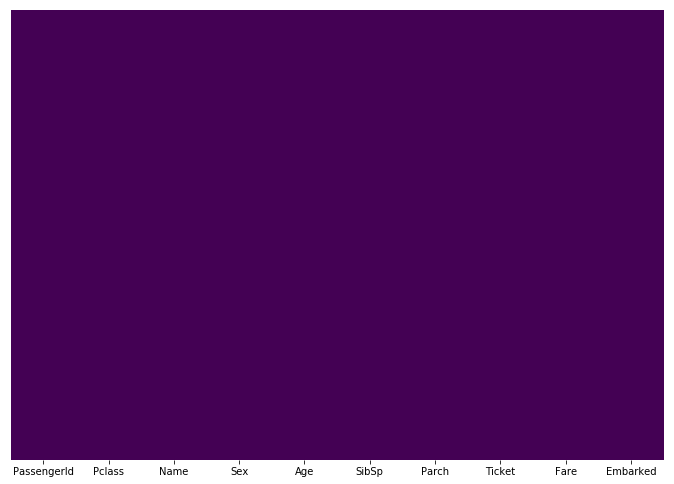

In [24]:
data_test.dropna(inplace=True)
plt.figure(figsize=dims)
sb.heatmap(data_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
data_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [26]:
data_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


#### Creating dummy values of categorical columns

In [27]:
sex_train = pd.get_dummies(data_train['Sex'], drop_first=True)
sex_test = pd.get_dummies(data_test['Sex'], drop_first=True)

In [28]:
embarked_train = pd.get_dummies(data_train['Embarked'])
embarked_test = pd.get_dummies(data_test['Embarked'])

In [29]:
pclass_train = pd.get_dummies(data_train['Pclass'])
pclass_test = pd.get_dummies(data_test['Pclass'])

In [30]:
data_train = pd.concat([data_train, sex_train, embarked_train, pclass_train], axis=1)
data_test = pd.concat([data_test, sex_test, embarked_test, pclass_test], axis=1)

In [31]:
data_train.drop(['PassengerId', 'Sex', 'Name', 'Embarked', 'Ticket', 'Pclass'], axis=1, inplace=True)
data_test.drop(['PassengerId', 'Sex', 'Name', 'Embarked', 'Ticket', 'Pclass'], axis=1, inplace=True)

In [32]:
data_train.columns = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'C', 'Q', 'S', 'Class1', 'Class2', 'Class3']

In [33]:
data_train.head()

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,Class1,Class2,Class3
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [34]:
data_test.columns = ['Age', 'SibSp', 'Parch', 'Fare', 'male', 'C', 'Q', 'S', 'Class1', 'Class2', 'Class3']
data_test.head()

,Age,SibSp,Parch,Fare,male,C,Q,S,Class1,Class2,Class3
0,34.5,0,0,7.8292,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,0,1,0,0,1


In [35]:
X = data_train.drop('Survived', axis=1)
y = data_train['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lrmodel = LogisticRegression()

In [40]:
lrmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
predictions = lrmodel.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87       163
          1       0.85      0.68      0.76       104

avg / total       0.83      0.83      0.82       267



In [44]:
new_prediction = lrmodel.predict(data_test)

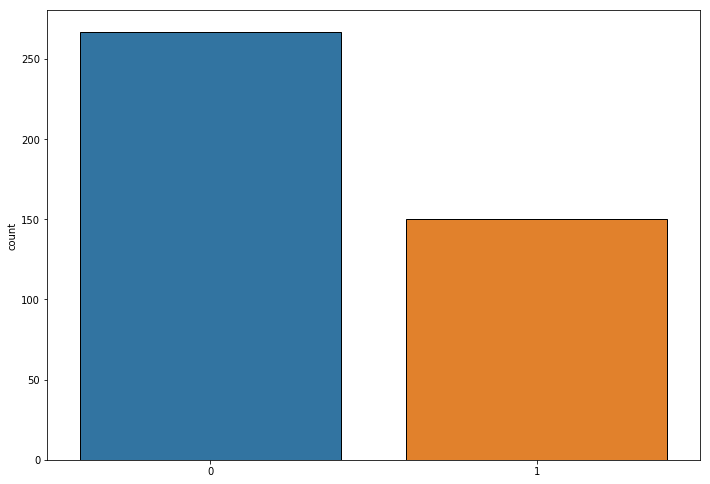

In [45]:
plt.figure(figsize=dims)
sb.countplot(new_prediction)